# Evaluation pipeline

## 0 Imports and Constants

In [1]:
import sys
import os

# Füge das übergeordnete Verzeichnis zu sys.path hinzu
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import seaborn as sns
from copy import deepcopy as dc

from utilities import split_data_into_sequences, load_sequential_time_series, reconstruct_sequential_data, Scaler, extract_features_and_targets_reg
from visual_evaluation import visualize
from predictive_evaluation import predictive_evaluation

In [3]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader
from baseline_model.LSTM import LSTMRegression, train_model
from utilities import Scaler, train_test_split, extract_features_and_targets_reg, split_data_into_sequences
from baseline_model.TimeSeriesDataset import TimeSeriesDataset

In [4]:
DATA_FOLDER = Path("../data")
REAL_DATA_FOLDER = DATA_FOLDER / "real"
SYNTHETIC_DATA_FOLDER = DATA_FOLDER / "synthetic"
BENCHMARK = False

## 1 Load and Visualize Data

### Ways of loading data
- Laden der Originaldaten: als pd dataframe 
- Laden der synthetischen, sequentiellen Daten: als np array (GAN, (V)AE)
- Laden der synthetischen, sequentiellen Daten: als pd dataframe (brownian, algorithmit)

In [5]:
# possible types: 'brownian_motion', 'timegan_lstm', 'timegan_gru'
syn_data_type = 'timegan_lstm'

In [6]:
# Load real time series
data_real_df = pd.read_csv(REAL_DATA_FOLDER/'metro_interstate_traffic_volume_label_encoded.csv')
data_real_numpy = dc(data_real_df).to_numpy()

if syn_data_type == 'timegan_lstm':
    # load sequential data (which should already be scaled)
    data_syn_numpy = load_sequential_time_series(SYNTHETIC_DATA_FOLDER/'mitv_28499_12_11_lstm_unscaled.csv', shape=(28499, 12, 11))

elif syn_data_type == 'timegan_gru':
    data_syn_numpy = load_sequential_time_series(SYNTHETIC_DATA_FOLDER/'mitv_28499_12_11_gru_unscaled.csv', shape=(28499, 12, 11))

elif syn_data_type == 'brownian_motion':
    data_syn_df = pd.read_csv(SYNTHETIC_DATA_FOLDER/'mitv_brownian_motion.csv')
    data_syn_numpy = dc(data_syn_df).to_numpy()

## 2 Train and Test Baseline Model

### Set Hyperparameters and Features

In [7]:
hyperparameters = {
    "seq_len": 12,
    "lr": 0.0001,
    "batch_size": 32,
    "hidden_size": 4,
    "num_layers": 1,
    "num_evaluation_runs": 1,
    "num_epochs": 20,
    "device": 'cuda' if torch.cuda.is_available() else 'cpu'
}

In [8]:
results = predictive_evaluation(data_real_numpy, data_syn_numpy, hyperparameters, verbose=True)

HYPERPARAMETERS:
seq_len :  12
lr :  0.0001
batch_size :  32
hidden_size :  4
num_layers :  1
num_evaluation_runs :  1
num_epochs :  20
device :  cpu
Synthetic Data is sequential: True
Shape of the data after splitting into sequences: (25648, 12, 11)
Shape of the data after splitting into sequences: (2841, 12, 11)


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1
Training Loss: 0.17993359182029964
Training Loss: 0.13528828278183938
Training Loss: 0.09521667890250683
Training Loss: 0.07851354293525219
Validation Loss: 0.07029184619529863
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.07168676709756255
Training Loss: 0.06989871513098478
Training Loss: 0.06585115514695644
Training Loss: 0.06323509072884917
Validation Loss: 0.057414984518892306
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.05885014792904258
Training Loss: 0.056339084170758724
Training Loss: 0.05107827581465244
Training Loss: 0.046813293118029835
Validation Loss: 0.040709271985158495
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.040962856160476804
Training Loss: 0.037411773856729266
Training Loss: 0.03139415493234992
Training Loss: 0.028733520954847335
Validation Loss: 0.024284949076225918
Validation Accuracy:

/Users/arneallwardt/Documents/-Studium/Bachelorarbeit/time_series_data_augmentation/data_evaluation/predictive_evaluation.py:141: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{'Model': evaluation_method, 'Metric': 'MAE', 'Error': mae}])], ignore_index=True)
  0%|          | 0/1 [00:24<?, ?it/s]


Training Loss: 0.009174345664214344
Validation Loss: 0.007253910025079431
Validation Accuracy: 0.0
**************************************************
Shape of the data after splitting into sequences: (28500, 12, 11)


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 1
Training Loss: 0.13726183775812387
Training Loss: 0.1059443723782897
Training Loss: 0.08123005604371429
Training Loss: 0.0666080804169178
Validation Loss: 0.06315517510390944
Validation Accuracy: 0.0
**************************************************
Epoch: 2
Training Loss: 0.05763170385733247
Training Loss: 0.05628174095414579
Training Loss: 0.050373494029045104
Training Loss: 0.04572590309195221
Validation Loss: 0.04580032198379437
Validation Accuracy: 0.0
**************************************************
Epoch: 3
Training Loss: 0.04181327865459025
Training Loss: 0.04139327158220112
Training Loss: 0.037301108045503496
Training Loss: 0.03317428196314722
Validation Loss: 0.034109686056358945
Validation Accuracy: 0.0
**************************************************
Epoch: 4
Training Loss: 0.031153721562586726
Training Loss: 0.03146312963217497
Training Loss: 0.029765458945184946
Training Loss: 0.026641102065332233
Validation Loss: 0.028732164452473324
Validation Accuracy: 0.

  0%|          | 0/1 [00:24<?, ?it/s]

Training Loss: 0.011512200274737552
Validation Loss: 0.012278696395353311
Validation Accuracy: 0.0
**************************************************


In [9]:
results.head()

,Model,Metric,Error
0,TRTS,MAE,1.456566e+03
1,TRTS,MSE,3.158120e+06
2,TSTR,MAE,8.141467e+02
3,TSTR,MSE,1.148869e+06


In [10]:
mse_results = results.loc[results['Metric'] == 'MSE']
mae_results = results.loc[results['Metric'] == 'MAE']

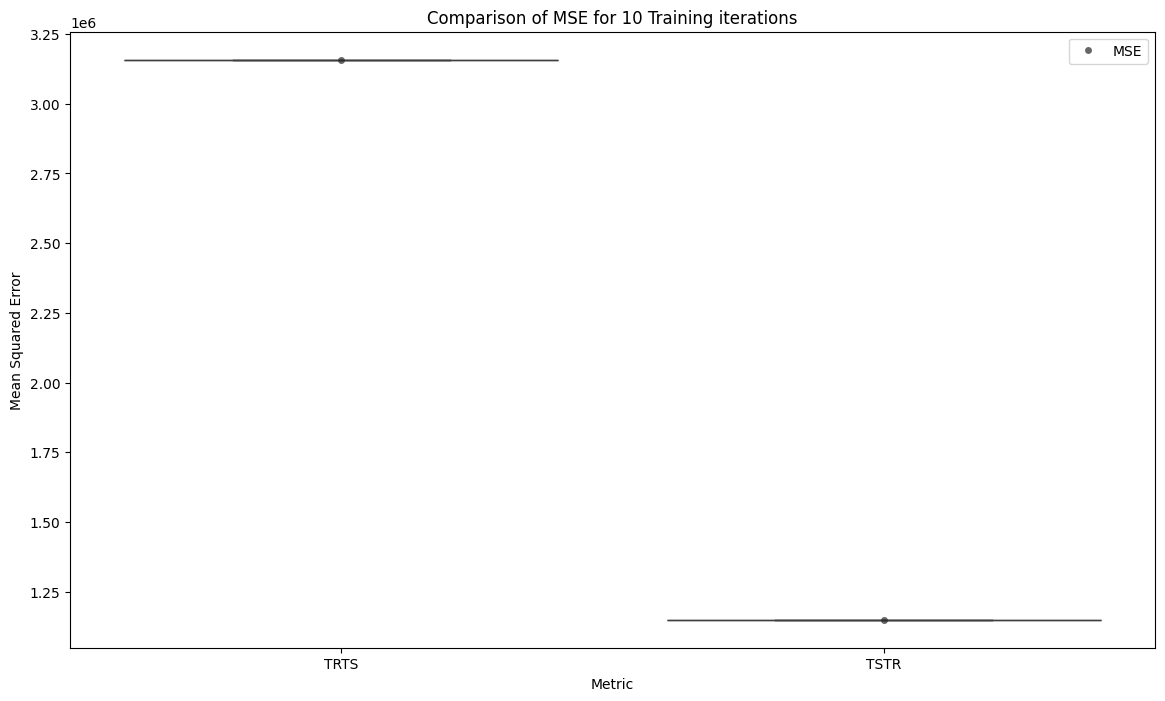

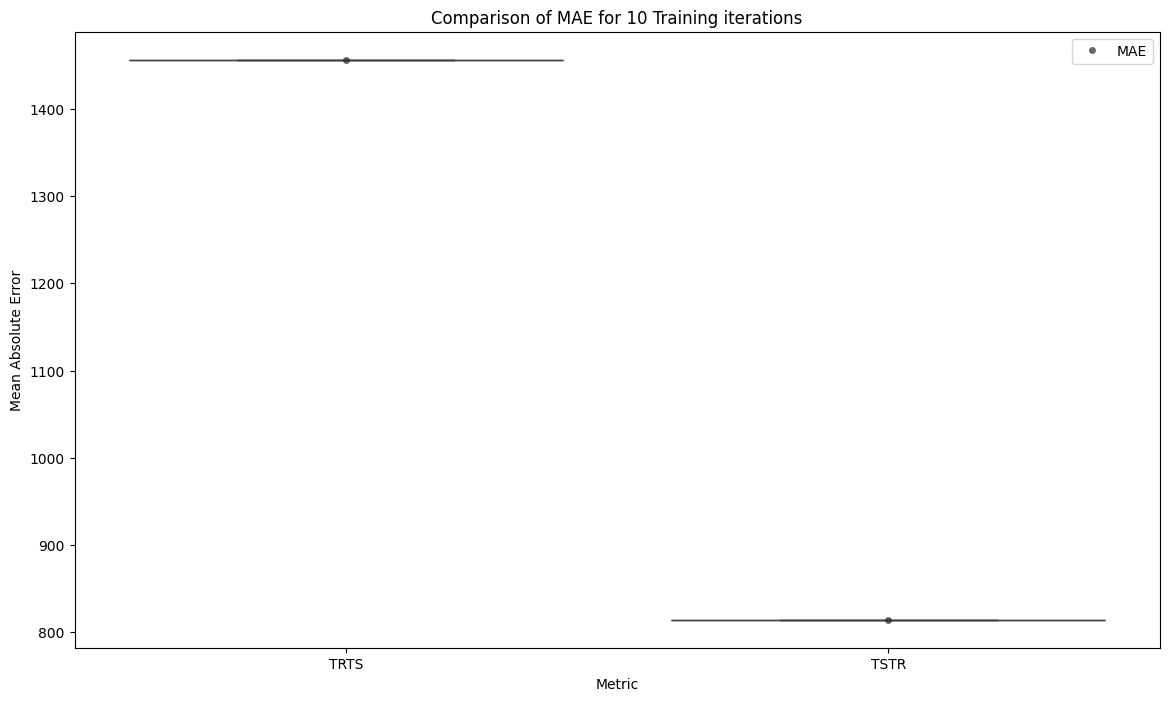

In [11]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Error', hue='Model', data=mse_results)
sns.stripplot(x='Model', y='Error', hue='Metric', data=mse_results, dodge=True, jitter=True, palette='dark:black', alpha=0.7)
plt.ylabel('Mean Squared Error')
plt.xlabel('Metric')
plt.title('Comparison of MSE for 10 Training iterations')
plt.legend()

plt.figure(figsize=(14, 8))
sns.boxplot(x='Model', y='Error', hue='Model', data=mae_results)
sns.stripplot(x='Model', y='Error', hue='Metric', data=mae_results, dodge=True, jitter=True, palette='dark:black', alpha=0.7)
plt.ylabel('Mean Absolute Error')
plt.xlabel('Metric')
plt.title('Comparison of MAE for 10 Training iterations')
plt.legend()

## 3 Visualize Synthetic vs Real Data

In [12]:
visualize(data_real_split, data_syn_split, metric='pca')
visualize(data_real_split, data_syn_split, metric='tsne')

NameError: name 'data_real_split' is not defined

### Beispielaussage:
PCA-Analyse von Realen und Synthetischen Daten
Um die Ähnlichkeit zwischen den realen und synthetischen Daten zu bewerten, wurde eine Principal Component Analysis (PCA) durchgeführt. Die PCA reduziert die Dimensionalität der Daten und projiziert sie auf eine zweidimensionale Ebene, wobei die Hauptkomponenten beibehalten werden, die den größten Teil der Varianz erklären.

Abbildung X zeigt den PCA-Plot der realen (rote Punkte) und synthetischen Daten (blaue Punkte). Die folgenden Beobachtungen können gemacht werden:

Verteilung und Clusterbildung:

Die roten Punkte, die die realen Daten repräsentieren, sind in einem spezifischen Bereich konzentriert.
Die blauen Punkte, die die synthetischen Daten darstellen, zeigen eine größere Verteilung und decken einen breiteren Bereich ab.
Ähnlichkeit und Unterschiede:

Die Tatsache, dass die synthetischen Daten eine größere Variabilität aufweisen, könnte darauf hinweisen, dass sie eine breitere Vielfalt an Mustern generieren.
Die Cluster der realen und synthetischen Daten überlappen sich teilweise, was darauf hindeutet, dass die synthetischen Daten einige der Eigenschaften der realen Daten gut nachahmen. Allerdings gibt es auch Bereiche, in denen die synthetischen Daten stark von den realen Daten abweichen, was auf Unterschiede in den zugrunde liegenden Verteilungen hinweist.
Schlussfolgerung:

Die PCA-Analyse zeigt, dass die synthetischen Daten in gewissem Maße die Struktur der realen Daten einfangen, jedoch eine größere Variabilität aufweisen.
Weitere Untersuchungen und Anpassungen am Generierungsprozess der synthetischen Daten könnten notwendig sein, um deren Genauigkeit und Übereinstimmung mit den realen Daten zu verbessern.